In [11]:
import pandas as pd
import numpy as np

In [12]:
df=pd.read_csv('data/df_cleaned.csv')

## penultima limpieza

In [13]:
df['gk'] =df['gk'].replace("+","")

In [15]:
df['gk'] = df['gk'].str.replace(r'\+', '', regex=True)


In [17]:
df.gk.fillna(0,inplace=True)

In [19]:
df['gk']=df.gk.astype(int)

In [20]:
df['gk'].unique()

array([15, 16, 14, 17, 87, 34, 13, 18, 85, 83,  8, 84, 12, 82,  9, 11, 80,
       81, 20,  6,  7, 79, 35, 10, 78, 77,  5, 76, 75, 25, 74, 73, 72, 27,
       33, 71, 70, 69, 68, 67, 66, 65, 39, 64, 63, 62, 61, 60, 59,  4, 58,
       57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 43, 19, 37, 21, 38,
       23, 22, 29, 31, 28, 32, 44, 89, 86, 45, 90, 88, 24,  0])

## feature engineering

In [ ]:
#transformar a variables numéricas las variables categóricas
#balancear modelo

## modelo (con pruebas)

In [67]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import ensemble



In [22]:
from sklearn.metrics import classification_report
target=[]
#elegimos el % de target para que sea 0 y 1
for i in df.progresion_anual:
    if i>0.1:
        target.append(1)
    else:
        target.append(0)
df["target"]=target


In [75]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


In [76]:
#elegir la X
X=df.select_dtypes(include=numerics).drop(["progresion_anual","sofifa_id","nationality_id","target"],axis=1)
y=df.progresion_anual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)

In [78]:
model3.feature_importances_

array([2.06857933e-01, 1.16693313e-02, 1.43372474e-02, 9.57834408e-03,
       4.63778336e-02, 1.11362027e-02, 1.28330201e-02, 1.87027971e-02,
       3.36045202e-03, 1.82141647e-02, 1.74471417e-02, 8.66400345e-03,
       1.63142329e-04, 5.07468521e-04, 2.55641290e-03, 1.34184015e-03,
       4.26614859e-04, 6.39100689e-03, 4.83956162e-03, 4.85598237e-03,
       3.98974019e-03, 3.41503336e-03, 9.01074154e-03, 1.09556415e-02,
       8.01096909e-03, 1.19866590e-02, 7.69596502e-03, 8.22565566e-03,
       7.61142445e-03, 1.11685422e-02, 1.01376428e-02, 1.06789877e-02,
       7.62091720e-03, 1.02238540e-02, 8.96999283e-03, 1.28452425e-02,
       1.42657393e-02, 1.16099281e-02, 1.20731865e-02, 1.46512331e-02,
       1.03621973e-02, 1.42434021e-02, 8.60734323e-03, 1.32814132e-02,
       1.00901100e-02, 9.30308765e-03, 1.06581792e-02, 1.17744175e-02,
       3.10202268e-02, 9.58960829e-03, 6.41685602e-03, 9.05237137e-03,
       9.26430102e-03, 9.84850122e-03, 1.03635117e-02, 8.90266135e-03,
      

In [80]:
model4=ensemble.RandomForestRegressor().fit(X_train,y_train)

In [77]:
#modelo 1
model3=DecisionTreeRegressor().fit(X_train,y_train)
#y_pred=model2.predict(X_test)
#print(classification_report(y_test, y_pred))

In [50]:
y_pred=model2.predict(X_test)

In [69]:
model4.score(X_test,y_test)

0.2735860463467571

In [71]:
model4.score(X_train,y_train)

0.9006360298817907

In [72]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [57]:
import seaborn as sns

<AxesSubplot:>

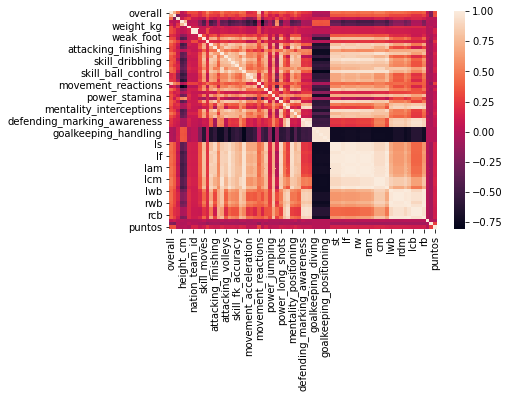

In [59]:
sns.heatmap(X.corr())

In [53]:
X_train.columns

Index(['overall', 'potential', 'age', 'height_cm', 'weight_kg',
       'club_position', 'nation_team_id', 'nation_position', 'weak_foot',
       'skill_moves', 'international_reputation', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking_awareness', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning',

In [74]:
df[df.isnumeric()]

AttributeError: 'DataFrame' object has no attribute 'isnumeric'

In [73]:
df.select_dtypes(float).columns

Index(['value_eur', 'wage_eur', 'club_team_id', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'mentality_composure',
       'goalkeeping_speed', 'progresion_anual', 'overall_team/year',
       'teams_in_league/year', 'mean_league/year', 'mean_team/year'],
      dtype='object')

In [25]:
#modelo 2
model=svm.SVC()
model.fit(X_train,y_train).score(X_test,y_test)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     12529
           1       0.00      0.00      0.00       634

    accuracy                           0.95     13163
   macro avg       0.48      0.50      0.49     13163
weighted avg       0.91      0.95      0.93     13163



C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
